In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import boxcox

In [38]:
data = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

In [39]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [40]:
data.select_dtypes(include = np.number)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [49]:
def plot_histboxplot(data):
    for col in data.columns:
        if data[col].dtype in ['int64', 'float64']:
            fig, ax = plt.subplots(1, 3, figsize=(15, 4))
            
            ax[0].hist(data[col], bins=10)
            ax[0].set_xlabel(col)
            ax[0].set_ylabel('Frequency')
            ax[0].set_title('Hist'.format(col))
            
            data_boxcox = data[col][data[col] > 0]
            data_boxcox, _ = boxcox(data_boxcox)
            
            ax[1].hist(data_boxcox, bins=10)
            ax[1].set_xlabel('Box-Cox Transformed '+col)
            ax[1].set_ylabel('Frequency')
            ax[1].set_title('Box-Cox Transformed '+col)
            
            ax[2].boxplot(data_boxcox)
            ax[2].set_xlabel('Box-Cox Transformed '+col)
            ax[2].set_ylabel('Value')
            ax[2].set_title('Box-Cox Transformed '+col)
            
            plt.show()

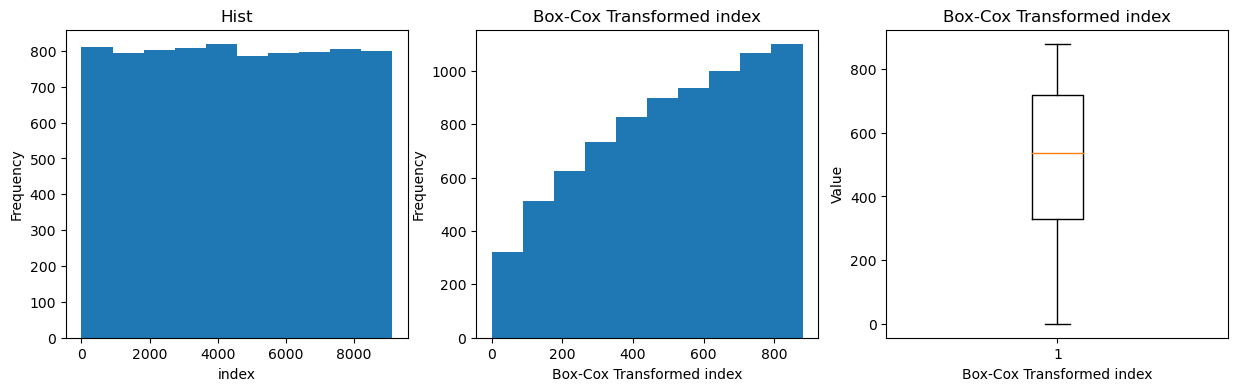

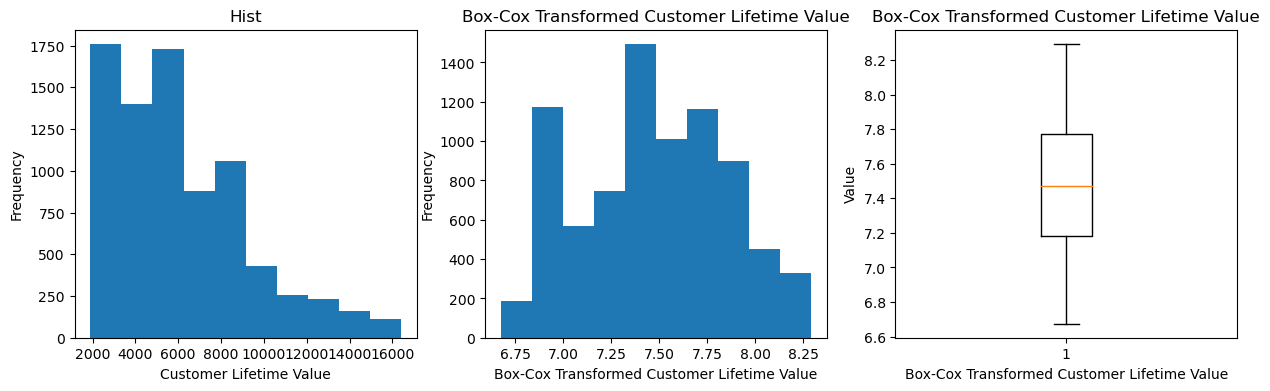

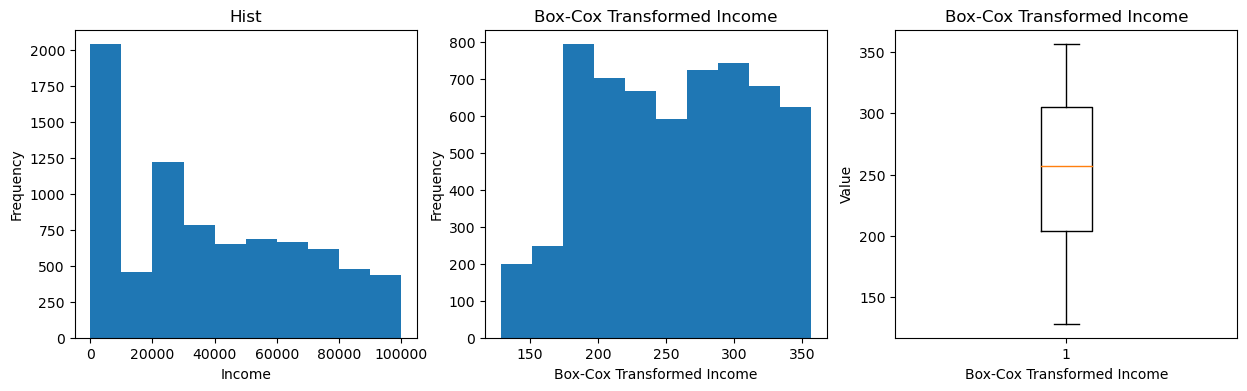

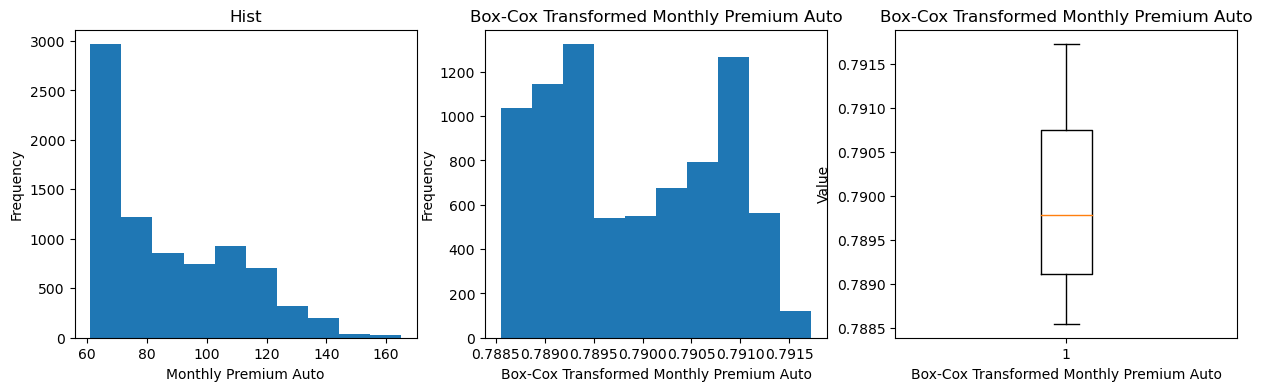

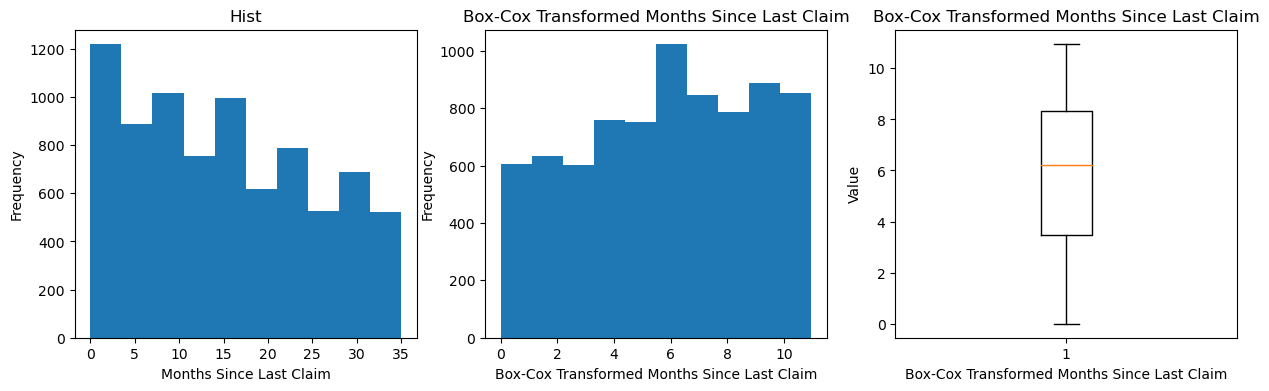

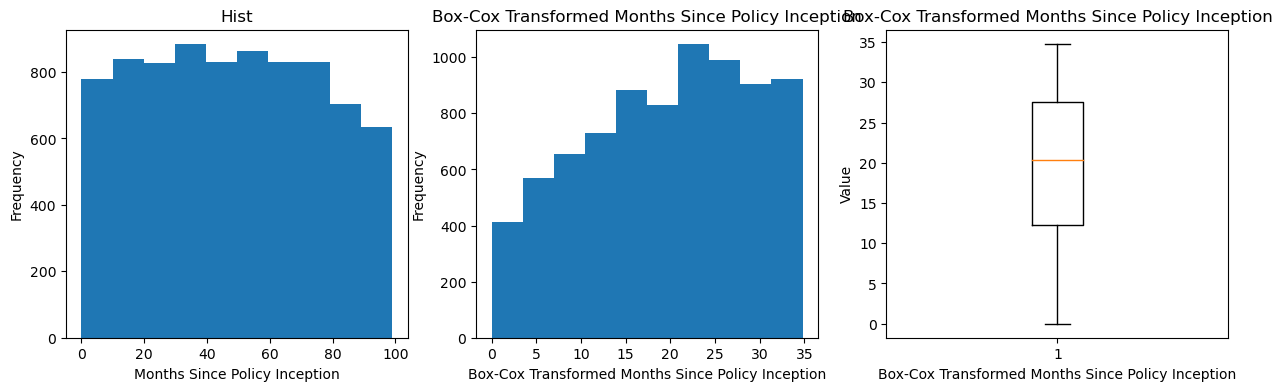

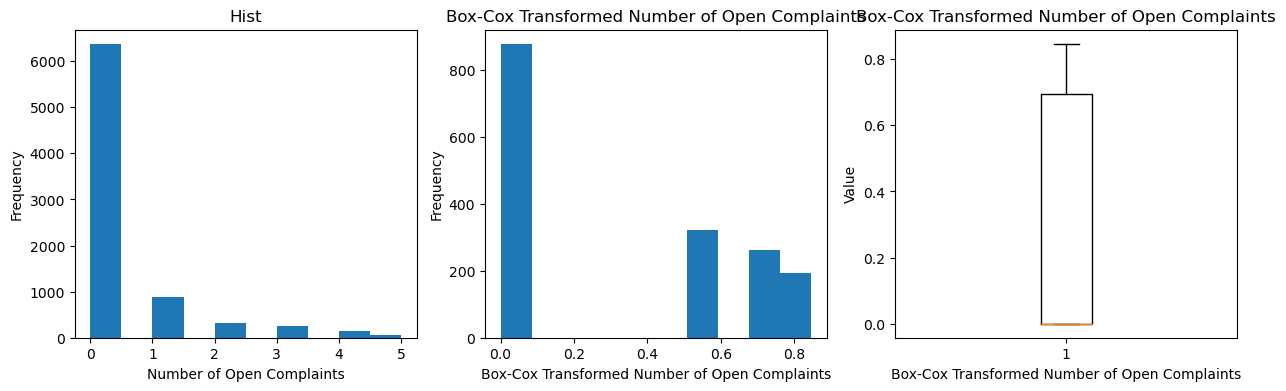

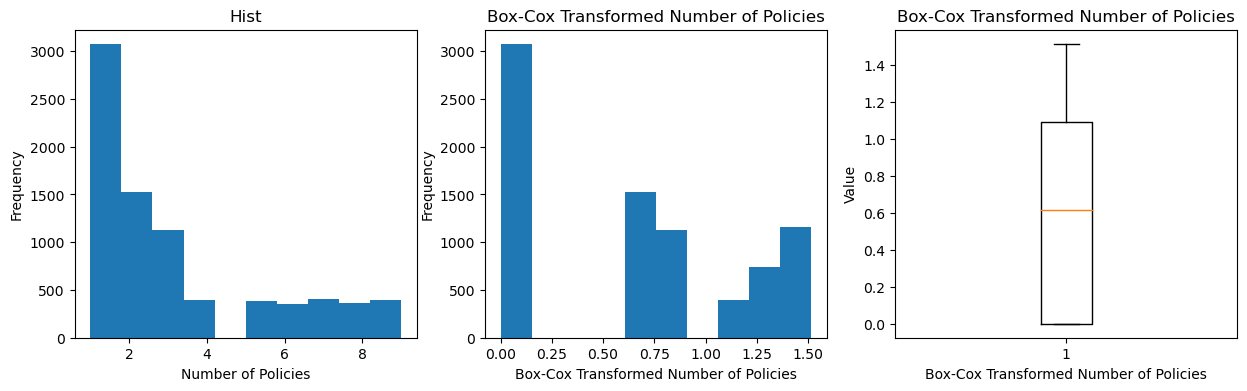

In [51]:
plot_histboxplot(data.drop('Total Claim Amount',axis=1))

2# / 3#. So I deliberate gather together this 2 question into a function, making a transformation directly
      #  and the result is that in general the boxcox transformation makes a good solution to a normal distirbution.